In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import datetime as dt
import hvplot.pandas
from pathlib import Path
import seaborn as sns

In [6]:
#data load-in / initial mods
transactions = Path("eth_all_transactions_transaction_costs.csv")
transactions_cost= pd.read_csv(transactions,infer_datetime_format=True,parse_dates=True)
transactions_cost["transaction_date"]=pd.to_datetime(transactions_cost["transaction_date"])
transactions_cost["transaction_date"]=transactions_cost["transaction_date"].dt.date
transactions_cost.rename(columns={"sum_daily_transaction_fees":"Sum of Daily Transactions", "total_daily_value":"Daily Sum of ETH"},inplace=True)
transactions_cost.set_index("transaction_date",inplace=True)
transactions_cost.sort_index(ascending=True,inplace=True)

price = Path("price_vol.csv")
price_data= pd.read_csv(price,index_col="price_date",infer_datetime_format=True).reset_index()
price_data.rename(columns={"eth_price":"ETH Close", "btc_price":"BTC Close", "eth_volume":"ETH Volume"},inplace=True)
price_data.sort_index(ascending=True,inplace=True)
#def to_date_time(price_data):
 #   return dt.datetime.fromtimestamp(price_data).strftime("%Y-%m-%d")

price_data["price_date"]=pd.to_datetime(price_data["price_date"])
price_data["price_date"]=price_data["price_date"].dt.date
price_data.set_index("price_date",inplace=True)
price_btc_eth=price_data
price_btc_eth.drop(columns=["ETH Volume","btc_volume"],inplace=True)

df_price_cost=pd.concat([transactions_cost, price_data],axis="columns", join="inner")
df_price_cost.drop(columns=["BTC Close"],axis=1,inplace=True)

# Gold Price
GOLD_DATA = Path("GoldPricePerOunceHistoricalQuotes.csv")
GOLD = pd.read_csv(GOLD_DATA)
GOLD[" Date"]= pd.to_datetime(GOLD["Date"])
GOLD[" Date"]=GOLD[" Date"].dt.date
GOLD.set_index(" Date", inplace = True)
GOLD = GOLD.rename(columns={' Close/Last': 'Gold Close'})
GOLD.drop(columns=['Date',' Volume', ' Open', ' High', ' Low'], axis='1', inplace=True)

#Euro Price
EUR_USD_DATA = Path("EURUSD=X.csv")
EUR_USD = pd.read_csv(EUR_USD_DATA)
EUR_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
EUR_USD["Date"]= pd.to_datetime(EUR_USD["Date"])
EUR_USD["Date"]=EUR_USD["Date"].dt.date
EUR_USD.set_index("Date", inplace = True)
EUR = EUR_USD.rename(columns={'Close' : 'EUR Close'})

# Pound Price
GBP_USD_DATA = Path("GBPUSD=X.csv")
GBP_USD = pd.read_csv(GBP_USD_DATA)
GBP_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
GBP_USD["Date"]= pd.to_datetime(GBP_USD["Date"])
GBP_USD["Date"]=GBP_USD["Date"].dt.date
GBP_USD.set_index("Date", inplace = True)
GBP = GBP_USD.rename(columns={'Close' : 'GBP Close'})

# Yen Price
JPY_USD_DATA = Path("JPYUSD=X.csv")
JPY_USD = pd.read_csv(JPY_USD_DATA)
JPY_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
JPY_USD["Date"]= pd.to_datetime(JPY_USD["Date"])
JPY_USD["Date"]=JPY_USD["Date"].dt.date
JPY_USD.set_index("Date", inplace = True)
JPY = JPY_USD.rename(columns={'Close' : 'JPY Close'})

# Mining Difficulty 
Mining_Difficulty_DATA = Path("mining_difficulty_sum_daily_2015_to_current.csv")
Mining_Difficulty1 = pd.read_csv(Mining_Difficulty_DATA)
Mining_Difficulty2 = Mining_Difficulty1.rename(columns={'f0_' : 'Date' , 'f1_' : 'Mining Difficulty'})
Mining_Difficulty2["Date"]= pd.to_datetime(Mining_Difficulty2["Date"])
Mining_Difficulty2["Date"]=Mining_Difficulty2["Date"].dt.date
Mining_Difficulty2.sort_values(by=['Date'], inplace=True)
Mining_Difficulty2.set_index("Date", inplace = True)
Mining_Difficulty= Mining_Difficulty2['Mining Difficulty'].astype('float64')

SP500_DATA = Path("SP500.csv")
SP500 = pd.read_csv(SP500_DATA, infer_datetime_format=True)
SP500["Date"]= pd.to_datetime(SP500["Date"])
SP500["Date"]=SP500["Date"].dt.date
SP500.set_index("Date", inplace = True)
SP500_Close = SP500.rename(columns={'Close' : 'SP500 Close'})

#removed later, but needed to run
Oil_Price_DATA = Path("OilPricePerBarrelHistoricalQuotes.csv")
Oil_USD = pd.read_csv(Oil_Price_DATA, infer_datetime_format=True)
Oil_USD.drop(columns=[' Volume', ' Open', ' High', ' Low'], axis='1', inplace=True)
Oil_USD = Oil_USD.rename(columns={' Close/Last': 'Close'})
Oil_USD["Date"]= pd.to_datetime(Oil_USD["Date"])
Oil_USD["Date"]=Oil_USD["Date"].dt.date
Oil_USD.set_index("Date", inplace = True)
Oil = Oil_USD.rename(columns={'Close' : 'OIL Close'})


df_currency=pd.concat([JPY, GBP, EUR],axis="columns",join="inner")
df_assets=pd.concat([SP500_Close, Oil, GOLD, price_data],axis="columns",join="inner")
df_assets.drop(columns=["BTC Close"],axis=1,inplace=True)

Price_and_Volume = Path("price_vol.csv")
Price = pd.read_csv(Price_and_Volume)
Price["price_date"]= pd.to_datetime(Price["price_date"])
Price["price_date"]=Price["price_date"].dt.date
Price_close = Price.rename(columns={'price_date': 'Date',
                                   'eth_price' : 'ETH Close',
                                   'btc_price' : 'BTC Close'})
Price_close.set_index("Date", inplace = True)

ETH_price = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
ETH_price.sort_values(by=['Date'], inplace=True)
ETH_price['ETH Close'].astype('float64')

BTC_Close = Price_close.drop(columns=['ETH Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
BTC_Close.sort_values(by=['Date'], inplace=True)

ETH_MiningDifficulty = pd.concat([Mining_Difficulty,ETH_price], axis='columns', join = 'inner')
ETH_MiningDifficulty.reset_index(inplace=True)

In [25]:
#function declarations

def get_eth_trans():
    fig,ax = plt.subplots()

    # make a plot
    ax.plot(transactions_cost["Daily Sum of ETH"], color="red")

    # set x-axis label
    ax.set_xlabel("year",fontsize=14)

    # set y-axis label
    ax.set_ylabel("Daily Sum of ETH",color="red",fontsize=14)    

    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()

    # make a plot with different y-axis using second axis object
    ax2.plot(transactions_cost["Sum of Daily Transactions"],color="blue")
    ax2.set_ylabel("ETH Price",color="blue",fontsize=14)
    return fig


def get_top_10():
    top_10 = transactions_cost.sort_values(by="Sum of Daily Transactions",ascending=False)

    # Bar chart of top ten transactions
    top_10_plt = top_10["Sum of Daily Transactions"][:10].hvplot.bar(
        title="Top Ten Transactions For ETH in 2020", 
        xlabel="Transaction Date",
        ylabel="Transaction Fees",
        figsize=(12,8),
        rot=50)
    return top_10_plt

def get_btc_eth_price():
    price_plt = price_btc_eth.hvplot.line(
    xlabel="Date",
    ylabel="ETH & BTC Price",
    title="ETH Price vs. BTC Price for last 5 years", 
    rot=50)
    return price_plt


def get_eth_price():
    eth_price_plt =price_data["ETH Close"].hvplot.line(
        x="price_date",
        y="ETH Close",
        xlabel="Date",
        ylabel="ETH Price",
        title="ETH Price for last 5 years", 
        figsize=(15,10),
        rot=50)
    return eth_price_plt

def get_eth_trans_price():
    #df_price_cost.hvplot.step(y=["total_daily_value","eth_price"],ylabel="Total Daily Transfers",xlabel="ETH Price",figsize=(15,))
    
    #df_price_cost.reset_index(inplace=True)
    fig,ax = plt.subplots()

    # make a plot
    ax.plot(df_price_cost["index"], df_price_cost["Daily Sum of ETH"], color="red")

    # set x-axis label
    ax.set_xlabel("year",fontsize=14)

    # set y-axis label
    ax.set_ylabel("Daily Sum of Transactions",color="red",fontsize=14)    

    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()

    # make a plot with different y-axis using second axis object
    ax2.plot(df_price_cost["index"], df_price_cost["ETH Close"],color="blue")
    ax2.set_ylabel("ETH Price",color="blue",fontsize=14)
    return fig

def get_eth_price_other_assets():
    return df_assets.hvplot.line()

def get_mining_difficulty():
    ETH_MiningDifficulty.reset_index(inplace = True)
    fig,ax= plt.subplots()
    ax.plot(ETH_MiningDifficulty["Date"], ETH_MiningDifficulty["Mining Difficulty"], color="red", marker="o")
    ax.set_xlabel('year' , fontsize=14)
    ax.set_ylabel('ETH Mining Difficulty',color='red',fontsize=14)
    ax2=ax.twinx()
    ax2.plot(ETH_MiningDifficulty['Date'], ETH_MiningDifficulty['ETH Close'],color='blue')
    ax2.set_ylabel('ETH Price',color='blue',fontsize=14)
    return fig

def get_mining_to_eth_close():
    ETH_MiningDifficulty.set_index('Date', inplace=True)
    ETH_Mining_Difficulty_Pct = ETH_MiningDifficulty.pct_change()
    cumulative_returns = (1+ETH_Mining_Difficulty_Pct).cumprod()-1
    return cumulative_returns.plot()

def get_heat_map_pct():
    ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    ETH_Close.sort_values(by=['Date'], inplace=True)
    combined_df = pd.concat([EUR, GBP, JPY, GOLD, SP500_Close, ETH_Close, BTC_Close], axis="columns", join="inner")
    pct_change = combined_df.pct_change()
    pct_change_correlation = pct_change.corr()
    hm = sns.heatmap(pct_change_correlation, annot=True)
    plt.title('Heatmap of Pct Change Correlation', fontsize = 20)
    return hm

def get_box_plot():  #may have issues due to earlier changes in DFs
    ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    ETH_Close.sort_values(by=['Date'], inplace=True)
    combined_df = pd.concat([EUR, GBP, JPY, GOLD, SP500_Close, ETH_Close, BTC_Close], axis="columns", join="inner")
    pct_change = combined_df.pct_change()
    bp = pct_change.plot.box(figsize=(20, 10), title="Portfolio Risk")
    return bp

def get_rolling_std():
    ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    ETH_Close.sort_values(by=['Date'], inplace=True)
    combined_df = pd.concat([EUR, GBP, JPY, GOLD, SP500_Close, ETH_Close, BTC_Close], axis="columns", join="inner")
    pct_change = combined_df.pct_change()
    pct_change.std()
    ETH_risk = pct_change["ETH Close"].std()
    pct_change.std() > ETH_risk
    annual_std = pct_change.std() * np.sqrt(252)
    assets_roll_std = pct_change.rolling(window=21).std()
    rolling_plt = assets_roll_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")
    return rolling_plt

def get_sharpe():
    ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    ETH_Close.sort_values(by=['Date'], inplace=True)
    combined_df = pd.concat([EUR, GBP, JPY, GOLD, SP500_Close, ETH_Close, BTC_Close], axis="columns", join="inner")
    pct_change = combined_df.pct_change()
    sharpe_ratios = (pct_change.mean() * 252) / (pct_change.std() * np.sqrt(252))
    sharpe_plt = sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")
    return sharpe_plt

def get_drawdown():
    ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    ETH_Close.sort_values(by=['Date'], inplace=True)
    DD_SP500 = SP500_Close
    DD_SP500['SP500 HighValue'] = DD_SP500['SP500 Close'].cummax()
    DD_SP500['SP500 Drawdown'] = DD_SP500['SP500 Close'] / DD_SP500['SP500 HighValue'] -1
    greatest_SP500_dd = DD_SP500['SP500 Drawdown'].min()
    DD_BTC = BTC_Close
    DD_BTC['BTC HighValue'] = DD_BTC['BTC Close'].cummax()
    DD_BTC['BTC Drawdown'] = DD_BTC['BTC Close'] / DD_BTC['BTC HighValue'] -1
    greatest_BTC_dd = DD_BTC['BTC Drawdown'].min()
    DD_EUR = EUR
    DD_EUR['EUR HighValue'] = DD_EUR['EUR Close'].cummax()
    DD_EUR['EUR Drawdown'] = DD_EUR['EUR Close'] / DD_EUR['EUR HighValue'] -1
    greatest_EUR_dd = DD_EUR['EUR Drawdown'].min()
    DD_GBP = GBP
    DD_GBP['GBP HighValue'] = DD_GBP['GBP Close'].cummax()
    DD_GBP['GBP Drawdown'] = DD_GBP['GBP Close'] / DD_GBP['GBP HighValue'] -1
    greatest_GBP_dd = DD_GBP['GBP Drawdown'].min()
    DD_JPY = JPY
    DD_JPY['JPY HighValue'] = DD_JPY['JPY Close'].cummax()
    DD_JPY['JPY Drawdown'] = DD_JPY['JPY Close'] / DD_JPY['JPY HighValue'] -1
    greatest_JPY_dd = DD_JPY['JPY Drawdown'].min()
    DD_ETH = ETH_Close
    DD_ETH['ETH HighValue'] = DD_ETH['ETH Close'].cummax()
    DD_ETH['ETH Drawdown'] = DD_ETH['ETH Close'] / DD_ETH['ETH HighValue'] -1
    greatest_ETH_dd = DD_ETH['ETH Drawdown'].min()
    DD_GOLD = GOLD
    DD_GOLD['Gold HighValue'] = DD_GOLD['Gold Close'].cummax()
    DD_GOLD['Gold Drawdown'] =  DD_GOLD['Gold Close'] / DD_GOLD['Gold HighValue'] -1
    greatest_GOLD_dd = DD_GOLD['Gold Drawdown'].min()
    greatest_GOLD_dd
    Drawdown = [-0.3392495902426059,-0.8473121646192736,-0.9421439618188613,-0.14809420615970725,-0.24815184017979908,-0.15506044559896104,-0.49279984536580657]
    index = ['SP500 Drawdown','BTC Drawdown',
            'ETH Drawdown','EUR Drawdown', 'GBP Drawdown',
            'JPY Drawdown','Gold Drawdown']
    DDDD = pd.DataFrame({"Drawdown" : Drawdown}, index = index)
    ax3 = DDDD.plot.barh(rot=0,figsize=(15,10),title = "Drawdown Index")
    return ax3


<AxesSubplot:title={'center':'Sharpe Ratios'}>

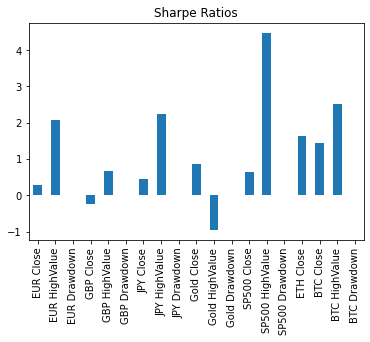

In [27]:
#function calls
get_eth_trans()
get_top_10()
get_btc_eth_price()
get_eth_price()
get_eth_trans_price()
get_eth_price_other_assets()
get_mining_difficulty()
get_mining_to_eth_close()
get_heat_map_pct()
get_box_plot()
get_rolling_std()
get_sharpe()
get_drawdown()
